Steps for creating a kmeans model is as follows:

 - 1.Clusters the data into k groups where k is predefined.
    
 - 2.Select k points at random as cluster centers.
    
 - 3.Assign objects to their closest cluster center according to the Euclidean distance function.
    
 - 4.Calculate the centroid or mean of all objects in each cluster.
    
 - 5.Repeat steps 2, 3 and 4 until the same points are assigned to each cluster in consecutive rounds.

In [1]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import random


In [10]:
X, y = make_blobs(n_samples=500,#total number of points equally divided among clusters
                  centers=5, #number of centers
                  n_features=2, #
                  shuffle=True,
                  random_state=40#Determines random number generation for dataset creation. Pass an intfor reproducible output across multiple function calls.
                
                 )

In [11]:
X

array([[ 6.26016515e-02,  1.81521927e+00],
       [ 6.01455258e+00, -5.04968460e+00],
       [-1.54230590e+00, -9.27217682e+00],
       [-9.15641627e-01, -5.80870992e+00],
       [ 4.88959267e+00,  2.92812926e+00],
       [-6.67435286e-01,  3.41758032e+00],
       [-2.89873749e+00, -8.81135610e+00],
       [-1.73176955e+00, -8.80461584e+00],
       [-1.96918445e+00,  3.46355406e+00],
       [-1.74626555e-01,  2.74909614e+00],
       [-1.20413923e+00, -9.06564093e+00],
       [ 5.75523947e+00,  5.40048888e-01],
       [ 3.44932993e-01,  3.03824393e+00],
       [ 1.48231851e-01,  2.58337110e+00],
       [ 6.02327121e+00,  3.77941610e+00],
       [-1.08848062e+00, -3.32053407e+00],
       [ 4.26829898e+00, -5.92683762e+00],
       [-2.32014955e+00, -4.23573635e+00],
       [-1.41025333e+00, -9.64558800e+00],
       [-4.92107981e-01, -4.12710901e+00],
       [-1.05326648e+00, -4.88931308e+00],
       [-3.60402040e-01, -3.20413806e+00],
       [ 4.48378886e-01,  3.68044902e+00],
       [ 2.

In [12]:
y.shape

(500,)

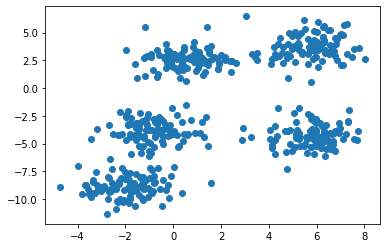

In [13]:
plt.scatter(X[:,0],X[:,1])

In [14]:
m = X.shape[0]
m

500

In [15]:
n=X.shape[1]
n

2

In [16]:
#initialize the centroids as k random samples of X
def initialize_random_k_centroids(X,k):
    m,n = X.shape
    
    centroids = []
    random_indexes = np.random.choice(m, k, replace=False)
    print(random_indexes)
    
    for ind  in random_indexes:
        centroid = X[ind]
        centroids.append(centroid)   
        
    return centroids 


In [18]:
k=5
centroids = initialize_random_k_centroids(X,k)
centroids

[262 493 473 483 178]


[array([1.07441748, 3.27871247]),
 array([5.21268848, 4.03286955]),
 array([-1.63828314, -8.93081624]),
 array([-1.81453265, -7.62003933]),
 array([0.46753544, 3.45194171])]

In [19]:
np.mean(centroids,axis=1)

array([ 2.17656497,  4.62277902, -5.28454969, -4.71728599,  1.95973858])

In [20]:
centroids

[array([1.07441748, 3.27871247]),
 array([5.21268848, 4.03286955]),
 array([-1.63828314, -8.93081624]),
 array([-1.81453265, -7.62003933]),
 array([0.46753544, 3.45194171])]

In [21]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [22]:
print(X[0],X[1])
print(euclidean_distance(X[0],X[1]))

[0.06260165 1.81521927] [ 6.01455258 -5.0496846 ]
9.08584751266156


In [23]:
def find_closest_centroid(j,centroids):

    # distance of the current sample to each centroid
    distances=[]
    for centroid in centroids:
        distances.append(euclidean_distance(j, centroid))

    return np.argmin(distances)
    

In [24]:
j=np.asarray([-4.95836863,5.96425277])
find_closest_centroid(centroids,j)

0

In [25]:
def create_clusters(centroids, X, k):
    m,n = np.shape(X)
    clusters=[]
   
    for _ in range(k): clusters.append([])

    for a,b in enumerate(X):
        #print(a)
        #print(b)
        closest_centroid = find_closest_centroid(b, centroids)
       
        clusters[closest_centroid].append(a)
       
    
    #print(clusters)
    return clusters
 


In [26]:
clusters = create_clusters(centroids, X,k)
clusters

[[25,
  34,
  37,
  41,
  60,
  61,
  62,
  65,
  74,
  77,
  78,
  111,
  113,
  120,
  127,
  129,
  130,
  141,
  154,
  160,
  161,
  170,
  180,
  190,
  193,
  200,
  208,
  227,
  229,
  234,
  252,
  262,
  264,
  267,
  271,
  279,
  285,
  311,
  330,
  343,
  357,
  359,
  376,
  382,
  385,
  391,
  399,
  417,
  427,
  432,
  444,
  447,
  456,
  476,
  478],
 [4,
  11,
  14,
  27,
  36,
  43,
  47,
  49,
  51,
  52,
  53,
  54,
  59,
  63,
  67,
  73,
  75,
  79,
  80,
  82,
  83,
  86,
  89,
  92,
  98,
  103,
  106,
  107,
  110,
  114,
  115,
  124,
  126,
  131,
  134,
  140,
  144,
  153,
  155,
  164,
  168,
  171,
  174,
  175,
  177,
  181,
  182,
  185,
  194,
  199,
  202,
  203,
  206,
  210,
  213,
  215,
  218,
  220,
  223,
  230,
  236,
  237,
  242,
  244,
  248,
  253,
  254,
  256,
  258,
  259,
  261,
  265,
  270,
  273,
  277,
  283,
  284,
  286,
  288,
  290,
  292,
  294,
  295,
  297,
  299,
  302,
  305,
  306,
  308,
  309,
  312,
  320,
  321,


In [27]:
#calculate new centroids as the means of the samples in each cluster
def update_new_centroids(clusters,X,k):
    m,n = X.shape
    centroids = np.zeros((k,n))
    #print(clusters)
    for a,b in enumerate(clusters):
        #print(a)
        #print(b)
        centroid =np.mean(X[b],axis=0)
        centroids[a] = centroid
        
    print(centroids)
    return(centroids)
    

In [28]:
new_centroids = update_new_centroids(clusters,X,k) 

[[ 1.33734915  2.14908682]
 [ 5.89976012  1.53493638]
 [-1.90938645 -9.30554577]
 [ 0.90600947 -4.80952888]
 [-0.30623691  2.69203731]]


In [29]:
X[clusters[0]]

array([[ 2.17951526,  2.52292475],
       [ 0.87793055,  2.3476979 ],
       [ 0.83925639,  2.98966039],
       [ 1.22027848,  2.72994677],
       [ 1.27148606,  2.56858113],
       [ 0.53962101, -1.47985708],
       [ 4.23944795, -3.36772978],
       [ 0.90920054,  3.20875233],
       [ 1.61399065,  2.62081685],
       [ 1.34204646,  2.24520345],
       [ 0.60240298,  2.73282676],
       [ 2.43252826,  1.41488182],
       [ 0.7423471 ,  2.69194638],
       [ 2.62665439,  2.30685336],
       [ 0.91240242,  2.53299945],
       [ 1.49810249,  3.16045724],
       [ 2.35720666,  2.41603368],
       [ 1.69969046,  2.83906845],
       [ 1.21594476,  2.65104487],
       [ 2.47630753,  2.46714915],
       [ 1.86922798,  1.76397822],
       [ 1.11284588,  2.63388772],
       [ 1.08985684,  2.0664303 ],
       [ 0.42948238,  1.66253063],
       [ 1.25216724,  1.17206241],
       [ 1.41922361,  3.60196363],
       [-0.03840541, -1.78280594],
       [ 1.07614952,  3.03469205],
       [ 0.53313897,

In [30]:
np.mean(X[clusters[0]],axis=0)

array([1.33734915, 2.14908682])

In [31]:
def any_differences(prev_centroid,curr_centroid,k):
    distances=[]
    for i in range(k):
        distances.append( euclidean_distance(prev_centroid[i],curr_centroid[i]))
    differences = np.sum(distances)
    print(distances)
    print(differences)
    if differences == 0:
        return False
    return True

In [32]:
print(any_differences(centroids,new_centroids,k))

[1.1598220422944407, 2.5907021421586904, 0.4625140266206386, 3.9115621470537625, 1.0845175687106536]
9.209117926838186
True


In [38]:
#classify samples as the index of their clusters
def get_cluster_labels(clusters,X,k):
    #each sample will get the label of the cluster it was assigned to
    m,n = X.shape
    y_preds = np.empty((m,1))
    #print(y_preds)
    for a,b in enumerate(clusters):
        #print(a)#index of each cluster
        #print(b)#each cluster- collection of indexes of X
        for v in b:
            y_preds[v] = a
            
    #print(y_preds)
    return y_preds

In [39]:
y_preds = get_cluster_labels(clusters,X,k)
#print(y_preds[421])

In [40]:
print(y_preds[421])


[1.]


In [43]:
#initialize k random samples from X as centroids 
centroids = initialize_random_k_centroids(X,k)
    
#iterate until convergence or for max iterations
for _ in range(500):
        
    #assign samples to closest centroids by creating k clusters
    clusters = create_clusters(centroids, X, k)
    
    #save current centroids for checking the convergence
    previous_centroids = centroids 
    
    #update new centroids in the clusters
    centroids = update_new_centroids(clusters,X,k)
    
    #check if clusters have changed
    if not any_differences(previous_centroids,centroids,k):
        break
     
    
    

[ 31 145 217  97  10]
[[-2.87305894 -8.85125754]
 [-0.14649145  0.57974907]
 [ 4.59421301 -1.04986711]
 [-0.67210485 -9.61520178]
 [-1.29465769 -8.44858713]]
[0.1753882714863061, 3.6374273022313375, 5.26227919415467, 0.3104366293786536, 0.6236577463787814]
10.009189143629747
[[-2.97625694 -8.92149085]
 [ 0.12288675  0.74619082]
 [ 5.72593771 -0.33890062]
 [-0.73635139 -9.59788083]
 [-1.15446379 -6.38293652]]
[0.12483005797023995, 0.31665038843392385, 1.336515672944307, 0.06654045952885462, 2.0704025685316867]
3.914939147409012
[[-2.80245974 -8.98005253]
 [ 0.48079091  2.02942876]
 [ 5.80633397 -0.26416842]
 [-1.00258527 -9.14311232]
 [-0.89265397 -4.53747104]]
[0.1833983005875392, 1.3322143247271259, 0.10976547982171203, 0.5269676151986842, 1.8639439916685654]
4.016289712003626
[[-2.74476553 -8.93507365]
 [ 0.80939016  2.70212569]
 [ 5.90754463 -0.30225727]
 [-0.96035095 -8.82882518]
 [-0.61835628 -3.92143722]]
[0.0731554558314929, 0.748664561689148, 0.10814045561972803, 0.317112199789

In [44]:
#classify samples as the index of their clusters
y_preds = get_cluster_labels(clusters,X,k)
y_preds

array([[1.],
       [2.],
       [3.],
       [4.],
       [1.],
       [1.],
       [0.],
       [3.],
       [1.],
       [1.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.],
       [4.],
       [2.],
       [4.],
       [3.],
       [4.],
       [4.],
       [4.],
       [1.],
       [4.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [4.],
       [3.],
       [0.],
       [3.],
       [1.],
       [1.],
       [4.],
       [2.],
       [1.],
       [4.],
       [1.],
       [4.],
       [1.],
       [4.],
       [1.],
       [3.],
       [3.],
       [4.],
       [1.],
       [3.],
       [2.],
       [4.],
       [1.],
       [1.],
       [1.],
       [1.],
       [4.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [4.],
       [2.],
       [1.],
       [1.],
       [1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [2.],
       [3.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],

In [45]:
def create_kmeans_plot(clusters,centroids,X,y_preds):
    plt.scatter(X[:, 0], X[:, 1], c=y_preds,s=50, cmap='viridis')
    for centroid in centroids:
        plt.scatter(*centroid, marker="x", color="black", linewidth=2)
    plt.show()
   

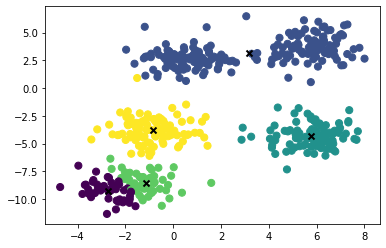

In [46]:
create_kmeans_plot(clusters,centroids,X,y_preds)

In [47]:
from scipy.spatial.distance import cdist
ls = [2,3,4,5,6,7,8,9,10]
costs = []
distortions = []
mappings = {}
for i in ls:
    k=i
    print(k)
    
    centroids = initialize_random_k_centroids(X,k)
    
    #iterate until convergence or for max iterations
    for _ in range(100):
        
        #assign samples to closest centroids by creating k clusters
        clusters = create_clusters(centroids, X, k)

        #save current centroids for checking the convergence
        previous_centroids = centroids 

        #update new centroids in the clusters
        centroids = update_new_centroids(clusters,X,k)

        #check if clusters have changed
        if not any_differences(previous_centroids,centroids,k):
            break
            
    y_preds = get_cluster_labels(clusters,X,k)
    #calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
    distortions.append(sum( np.min( cdist(X, centroids,'euclidean'), axis=1) ) / X.shape[0])
    mappings[k] = sum(np.min(cdist(X, centroids,'euclidean'), axis=1)) / X.shape[0]


print(distortions)
print(mappings)
    
    


2
[ 19 237]
[[ 0.81180237 -5.58312173]
 [ 3.44288036  2.99182441]]
[1.9545217397282637, 1.9369536168736012]
3.891475356601865
[[ 0.94543788 -5.73841612]
 [ 3.19738809  3.04901733]]
[0.2048775181623453, 0.25206642656907563]
0.45694394473142097
[[ 0.96117853 -5.72683338]
 [ 3.18545201  3.07535901]]
[0.01954298045903794, 0.028919781662402035]
0.048462762121439976
[[ 0.96117853 -5.72683338]
 [ 3.18545201  3.07535901]]
[0.0, 0.0]
0.0
3
[ 24 363  17]
[[-2.34479461 -9.86772845]
 [-0.18805288 -7.90513443]
 [ 2.66573881 -0.23715533]]
[0.4238826177990035, 1.5825082976483975, 6.391223108413702]
8.397614023861102
[[-2.34876602 -9.23928228]
 [-0.53123699 -5.60577008]
 [ 3.58655111  0.5383712 ]]
[0.6284587151268026, 2.3248337009232447, 1.2038840094194025]
4.15717642546945
[[-1.98343291 -8.9811774 ]
 [-0.04654301 -4.27693923]
 [ 3.97273592  1.03788892]]
[0.4473101992136197, 1.4144679820527517, 0.6313926370520022]
2.4931708183183736
[[-1.88150144 -8.86976017]
 [ 1.10751552 -4.16251374]
 [ 3.81767383  

[[ -2.49791042  -8.63270394]
 [  5.84866759  -5.17536342]
 [ -0.91229725  -8.06715938]
 [ -0.84502297  -3.60797365]
 [  5.71001262  -3.64389376]
 [  3.21316941   3.18166368]
 [ -2.21796934 -10.01639077]]
[0.29853086929471856, 0.02344073207660077, 0.03642301752803858, 0.33971008639715494, 0.017820967480049334, 0.19991152858393302, 0.16242211897570716]
1.0782593203362023
[[ -2.6703439   -8.60480494]
 [  5.83459658  -5.1592509 ]
 [ -0.8621564   -8.23754741]
 [ -0.84764066  -3.67748305]
 [  5.71859243  -3.62920592]
 [  3.19361246   3.17066139]
 [ -1.91126647 -10.0782366 ]]
[0.17467587564609982, 0.02139174962906812, 0.17761246052473456, 0.06955867929748001, 0.017010164313818674, 0.02243935534202825, 0.31287626295376714]
0.7955645477069966
[[-2.80748604 -8.58314494]
 [ 5.72890886 -5.11955343]
 [-0.88332596 -8.32420486]
 [-0.85854272 -3.77070887]
 [ 5.80574923 -3.57780302]
 [ 3.1717198   3.16038698]
 [-1.7307622  -9.94960699]]
[0.13884207525139697, 0.11289722414706908, 0.08920573517691813, 0.

9
[322 342 118 483 375 166 464 112 288]
[[-0.87585738  0.27851029]
 [ 6.0390831   3.27277287]
 [ 4.96311839 -4.50481343]
 [-1.66193948 -7.34475876]
 [-0.93897955 -4.7914459 ]
 [ 6.48484644 -4.12294982]
 [-1.91683325 -9.1151627 ]
 [-0.6671686  -3.46453589]
 [ 2.16560453  3.30183783]]
[3.081518370243657, 0.4399793303348855, 0.8364299125640975, 0.31474445784177973, 0.6448891078502608, 0.861609422172382, 0.8672436379709774, 0.8930392042969169, 2.592089384333327]
10.531542827608284
[[-0.38301865  1.91579079]
 [ 5.83476441  3.69924637]
 [ 4.84616716 -4.55485678]
 [-1.48426654 -7.72089395]
 [-1.21488319 -4.76227632]
 [ 6.41136563 -4.12700751]
 [-2.02643849 -9.2889411 ]
 [-0.64756446 -3.29776037]
 [ 1.10730575  2.88961715]]
[1.7098472030216836, 0.47289086987779216, 0.12720820975825817, 0.41598720452430815, 0.27744131317309173, 0.07359275818506078, 0.20545617720143003, 0.16792378232200678, 1.1357474151748101]
4.586094933238442
[[-0.37467956  2.2172812 ]
 [ 5.78274282  3.72205251]
 [ 4.84052366 

[[ 0.10563944  1.57449532]
 [-0.85333139 -3.84153515]
 [ 4.92802504  4.21629642]
 [-0.3620478   3.02462371]
 [ 5.76963426 -4.30242571]
 [-1.88150144 -8.86976017]
 [ 1.41771211  2.77704503]
 [ 6.40521978  4.88721367]
 [ 6.31409453  3.04744506]
 [ 4.27664679  2.65284105]]
[0.0, 0.0, 0.04242993036061527, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06031560991118029]
0.10274554027179555
[[ 0.10563944  1.57449532]
 [-0.85333139 -3.84153515]
 [ 4.92802504  4.21629642]
 [-0.3620478   3.02462371]
 [ 5.76963426 -4.30242571]
 [-1.88150144 -8.86976017]
 [ 1.41771211  2.77704503]
 [ 6.40521978  4.88721367]
 [ 6.31409453  3.04744506]
 [ 4.27664679  2.65284105]]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
[3.5817389579510284, 2.4808188906320057, 1.8386812502433767, 1.226833345649475, 1.1757211110985384, 1.7274066061315358, 1.080630374090193, 1.016039574726992, 1.0344048233448113]
{2: 3.5817389579510284, 3: 2.4808188906320057, 4: 1.8386812502433767, 5: 1.226833345649475, 6: 1.1757211110985384, 7: 1.72

In [48]:
for key, val in mappings.items():
    print(f'{key} : {val}')

2 : 3.5817389579510284
3 : 2.4808188906320057
4 : 1.8386812502433767
5 : 1.226833345649475
6 : 1.1757211110985384
7 : 1.7274066061315358
8 : 1.080630374090193
9 : 1.016039574726992
10 : 1.0344048233448113


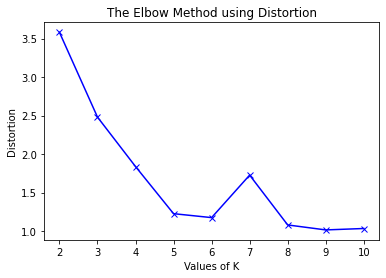

In [49]:
plt.plot(ls, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.